The CryptoFox project is work in progress

This article shows the code to manipulate pandas from CSV (used here in this workbook)


https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

introducing the ccxt library

https://colab.research.google.com/drive/1N0oareSybnEmrUJIB_EkLrrapjr24LP1?usp=sharing#scrollTo=tYPzqCTW0Rg8

more about what is the short (20 days) and long (100 days ) moving average  here https://blog.liquid.com/how-to-trade-cryptocurrency-using-moving-averages

In [1]:
!pip install ccxt

     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 294 kB 54.9 MB/s 
     |████████████████████████████████| 3.0 MB 39.2 MB/s 
     |████████████████████████████████| 1.3 MB 44.0 MB/s 
     |████████████████████████████████| 142 kB 47.1 MB/s 
     |████████████████████████████████| 291 kB 76.0 MB/s 


In [2]:
import ccxt

In [3]:
# Init the CCXT exchange object
binance = ccxt.binance()

# Requisite setup step
binance.load_markets()

print(f'Binance: {len(binance.markets)} markets loaded!')

Binance: 1658 markets loaded!


### All available markets and their assets

In [8]:
# All the available markets/pairs on Binance
', '.join([pair for pair in binance.markets.keys()])

'ETH/BTC, LTC/BTC, BNB/BTC, NEO/BTC, QTUM/ETH, EOS/ETH, SNT/ETH, BNT/ETH, BCC/BTC, GAS/BTC, BNB/ETH, BTC/USDT, ETH/USDT, HSR/BTC, OAX/ETH, DNT/ETH, MCO/ETH, ICN/ETH, MCO/BTC, WTC/BTC, WTC/ETH, LRC/BTC, LRC/ETH, QTUM/BTC, YOYOW/BTC, OMG/BTC, OMG/ETH, ZRX/BTC, ZRX/ETH, STRAT/BTC, STRAT/ETH, SNGLS/BTC, SNGLS/ETH, BQX/BTC, BQX/ETH, KNC/BTC, KNC/ETH, FUN/BTC, FUN/ETH, SNM/BTC, SNM/ETH, NEO/ETH, IOTA/BTC, IOTA/ETH, LINK/BTC, LINK/ETH, XVG/BTC, XVG/ETH, SALT/BTC, SALT/ETH, MDA/BTC, MDA/ETH, MTL/BTC, MTL/ETH, SUB/BTC, SUB/ETH, EOS/BTC, SNT/BTC, ETC/ETH, ETC/BTC, MTH/BTC, MTH/ETH, ENG/BTC, ENG/ETH, DNT/BTC, ZEC/BTC, ZEC/ETH, BNT/BTC, AST/BTC, AST/ETH, DASH/BTC, DASH/ETH, OAX/BTC, ICN/BTC, BTG/BTC, BTG/ETH, EVX/BTC, EVX/ETH, REQ/BTC, REQ/ETH, VIB/BTC, VIB/ETH, HSR/ETH, TRX/BTC, TRX/ETH, POWR/BTC, POWR/ETH, ARK/BTC, ARK/ETH, YOYOW/ETH, XRP/BTC, XRP/ETH, MOD/BTC, MOD/ETH, ENJ/BTC, ENJ/ETH, STORJ/BTC, STORJ/ETH, BNB/USDT, VEN/BNB, YOYOW/BNB, POWR/BNB, VEN/BTC, VEN/ETH, KMD/BTC, KMD/ETH, NULS/BNB, R

In [7]:
# All of their Base Markets
', '.join([pair for pair in binance.base_currencies.keys()])

'1INCH, 1INCHDOWN, 1INCHUP, AAVE, AAVEDOWN, AAVEUP, ACM, ADA, ADADOWN, ADAUP, ADX, AE, AERGO, AGI, AGIX, AION, AKRO, ALGO, ALICE, ALPACA, ALPHA, AMB, ANKR, ANT, APPC, AR, ARDR, ARK, ARN, ARPA, ASR, AST, ATA, ATM, ATOM, AUCTION, AUD, AUDIO, AUTO, AVA, AVAX, AXS, BADGER, BAKE, BAL, BAND, BAR, BAT, BCC, BCD, BCH, BCHA, BCHDOWN, BCHUP, BCN, BCPT, BEAM, BEAR, BEL, BETH, BGBP, BIFI, BKRW, BLZ, BNB, BNBBEAR, BNBBULL, BNBDOWN, BNBUP, BNT, BOND, BOT, BQX, BRD, BSV, BTC, BTCB, BTCDOWN, BTCST, BTCUP, BTG, BTS, BTT, BULL, BURGER, BUSD, BZRX, C98, CAKE, CDT, CELO, CELR, CFX, CHAT, CHR, CHZ, CKB, CLOAK, CLV, CMT, CND, COCOS, COMP, COS, COTI, COVER, CREAM, CRV, CTK, CTSI, CTXC, CVC, CVP, DAI, DASH, DATA, DCR, DEGO, DENT, DEXE, DF, DGB, DGD, DIA, DLT, DNT, DOCK, DODO, DOGE, DOT, DOTDOWN, DOTUP, DREP, DUSK, DYDX, EASY, EDO, EGLD, ELF, ENG, ENJ, EOS, EOSBEAR, EOSBULL, EOSDOWN, EOSUP, EPS, ERD, ERN, ETC, ETH, ETHBEAR, ETHBULL, ETHDOWN, ETHUP, EUR, EVX, EZ, FARM, FET, FIL, FILDOWN, FILUP, FIO, FIRO, FIS, 

### Set the asset to get data for

In [4]:
pair = 'BTC/USDT'

### All Available Timeframes for Binance: 
1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

In [12]:
all_timeframes = ', '.join([tf for tf in binance.timeframes.keys()])
print(f'All Available Timeframes for Binance: \n{all_timeframes}')

All Available Timeframes for Binance: 
1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M


### This is formatted as code

 Fetch 4-hour Intervals of: `time (is index), Open, High, Low, Close, Volume` (OHLCV) Data. 
 Note: time is in Unix timestamps

In [5]:
ohlcv = binance.fetch_ohlcv(pair, '4h')

In [6]:
ohlcv

[[1625630400000, 34445.55, 34919.28, 34373.02, 34710.38, 11129.03116],
 [1625644800000, 34710.4, 34989.0, 34457.11, 34827.96, 8225.437881],
 [1625659200000, 34827.97, 35059.09, 34477.13, 34528.6, 9621.907506],
 [1625673600000, 34528.6, 34784.0, 34412.43, 34628.72, 5806.111868],
 [1625688000000, 34628.71, 34628.71, 33777.77, 33862.12, 7923.751048],
 [1625702400000, 33862.11, 33929.64, 33066.0, 33305.65, 14140.832172],
 [1625716800000, 33305.66, 33512.53, 32242.07, 32487.57, 16322.335812],
 [1625731200000, 32487.56, 32748.88, 32077.0, 32696.44, 15022.67098],
 [1625745600000, 32696.43, 32988.87, 32350.0, 32900.01, 10513.954428],
 [1625760000000, 32900.05, 33177.06, 32641.36, 33003.52, 7693.819976],
 [1625774400000, 33002.45, 33067.09, 32508.0, 32875.71, 6442.866952],
 [1625788800000, 32875.71, 33100.0, 32261.07, 32941.81, 10152.733529],
 [1625803200000, 32941.81, 33310.0, 32742.0, 32910.21, 7671.504572],
 [1625817600000, 32902.13, 33065.0, 32598.0, 32774.99, 6198.980944],
 [1625832000000,

#### Isolate the Closing price for each day into an array/list
- Uses a `for` loop in square brackets **aka** a [List Comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) to construct the array


In [37]:
prices = [data[4] for data in ohlcv]
# data[4] is the closing price as returned by CCXT
# this location is standardized across exchanges by CCXT

#### Convert the Unix timestamps to Python date objects for the Chart's X Axis

In [38]:
from datetime import datetime

# Convert all the dates in the Asset Data
# // operator rounds to Floor with Ints
dates = [datetime.fromtimestamp(candle[0] // 1000) for candle in ohlcv]

# Print Example Comparison
print(f'Unix Timestamp: {ohlcv[0][0] // 1000}\n'
    + f'DateTime Object: {datetime.fromtimestamp(ohlcv[0][0] // 1000)}')

Unix Timestamp: 1625630400
DateTime Object: 2021-07-07 04:00:00


#### Create a `Pandas Series`, with the prices indexed by date

create panda dataframe

In [66]:
import pandas as pd

# Combine Columns of Dates and Prices
data = pd.Series(prices, index=dates) # series
data_df = pd.DataFrame(data=prices, index=dates, columns=["Price"]) # dataframe

print(f'Data Series: \n{data}') # What it looks like

Data Series: 
2021-07-07 04:00:00    34710.38
2021-07-07 08:00:00    34827.96
2021-07-07 12:00:00    34528.60
2021-07-07 16:00:00    34628.72
2021-07-07 20:00:00    33862.12
2021-07-08 00:00:00    33305.65
2021-07-08 04:00:00    32487.57
2021-07-08 08:00:00    32696.44
2021-07-08 12:00:00    32900.01
2021-07-08 16:00:00    33003.52
2021-07-08 20:00:00    32875.71
2021-07-09 00:00:00    32941.81
2021-07-09 04:00:00    32910.21
2021-07-09 08:00:00    32774.99
2021-07-09 12:00:00    33558.67
2021-07-09 16:00:00    33445.31
2021-07-09 20:00:00    33815.81
2021-07-10 00:00:00    33800.03
2021-07-10 04:00:00    33766.01
2021-07-10 08:00:00    33793.94
2021-07-10 12:00:00    33862.54
2021-07-10 16:00:00    33409.92
2021-07-10 20:00:00    33502.87
2021-07-11 00:00:00    33448.97
2021-07-11 04:00:00    33508.83
2021-07-11 08:00:00    33814.84
2021-07-11 12:00:00    33948.68
2021-07-11 16:00:00    33894.57
2021-07-11 20:00:00    34258.99
2021-07-12 00:00:00    34447.92
2021-07-12 04:00:00    342

### calculating the 20 days moving average

In [64]:
# Calculating the short-window simple moving average 
short_rolling = data.rolling(window=20).mean() # its a Panda Series

short_rolling_df = pd.DataFrame(short_rolling) # its a Panda Dataframe
short_rolling_df1 = short_rolling_df.rename(columns={'0':'SMA20'})
 
short_rolling_df1.head(500)
#np.size(short_rolling) #its 500

,0
2021-07-07 04:00:00,NaN
2021-07-07 08:00:00,NaN
2021-07-07 12:00:00,NaN
2021-07-07 16:00:00,NaN
2021-07-07 20:00:00,NaN
2021-07-08 00:00:00,NaN
2021-07-08 04:00:00,NaN
2021-07-08 08:00:00,NaN
2021-07-08 12:00:00,NaN
2021-07-08 16:00:00,NaN


### calculating the 50 days moving average

In [44]:
# Calculating the long-window simple moving average - its a Panda DataFrame
long_rolling = data.rolling(window=50).mean() # its a Panda Series
#long_rolling_df= long_rolling.rename(columns={'Price':'SMA50'}) # its a Panda Dataframe
long_rolling.tail(500)
#np.size(long_rolling) #its 500

2021-07-07 04:00:00           NaN
2021-07-07 08:00:00           NaN
2021-07-07 12:00:00           NaN
2021-07-07 16:00:00           NaN
2021-07-07 20:00:00           NaN
2021-07-08 00:00:00           NaN
2021-07-08 04:00:00           NaN
2021-07-08 08:00:00           NaN
2021-07-08 12:00:00           NaN
2021-07-08 16:00:00           NaN
2021-07-08 20:00:00           NaN
2021-07-09 00:00:00           NaN
2021-07-09 04:00:00           NaN
2021-07-09 08:00:00           NaN
2021-07-09 12:00:00           NaN
2021-07-09 16:00:00           NaN
2021-07-09 20:00:00           NaN
2021-07-10 00:00:00           NaN
2021-07-10 04:00:00           NaN
2021-07-10 08:00:00           NaN
2021-07-10 12:00:00           NaN
2021-07-10 16:00:00           NaN
2021-07-10 20:00:00           NaN
2021-07-11 00:00:00           NaN
2021-07-11 04:00:00           NaN
2021-07-11 08:00:00           NaN
2021-07-11 12:00:00           NaN
2021-07-11 16:00:00           NaN
2021-07-11 20:00:00           NaN
2021-07-12 00:

### if you just want to see the data (price of bitcoin) just type the below command

In [ ]:
data.plot()

### Here we pull all data values togeter: data, long_rolling, short_rolling

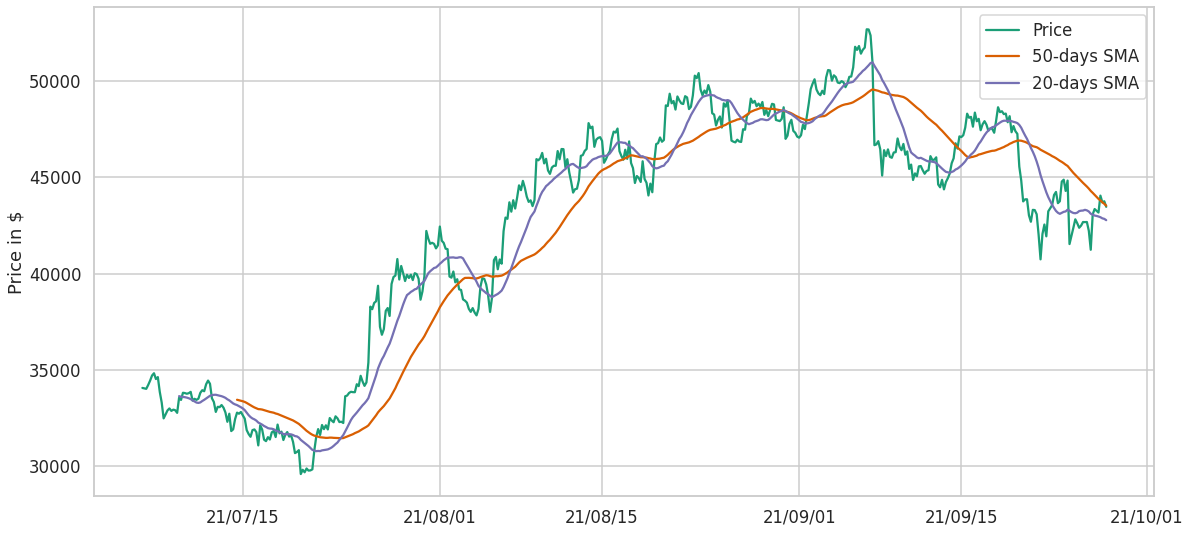

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(19,9))
#sns.set(style='darkgrid', context='talk', palette='Dark2')
sns.set(style='whitegrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%y/%m/%d')

ax.plot(data, label='Price')
ax.plot(long_rolling, label = '50-days SMA')
ax.plot(short_rolling, label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [157]:
#print(long_rolling[0:])
#type(long_rolling)
type(data)

pandas.core.series.Series

### Buy and sell signals

In [68]:
import numpy as np
import pandas as pd
#data['Signal'] = 0.0
data_df['Signal'] = np.where(short_rolling > long_rolling, 1.0, 0.0). #needs a dataframe to work, wont work on series
#sdata= np.where(short_rolling > long_rolling, 1.0, 0.0)
#print(hdata)
#type(hdata)
#data['signal'] = hdata.tolist()
#np.size(hdata)
#sdata.to_frame(name="signal") #turn series to a dataframe 
#sdata_df = pd.DataFrame(sdata, columns = ['Signal'])
data_df.tail(50)

,Price,Signal
2021-09-20 04:00:00,44824.89,1.0
2021-09-20 08:00:00,43739.75,1.0
2021-09-20 12:00:00,43844.88,1.0
2021-09-20 16:00:00,43850.25,1.0
2021-09-20 20:00:00,43015.62,1.0
2021-09-21 00:00:00,42683.01,0.0
2021-09-21 04:00:00,43301.07,0.0
2021-09-21 08:00:00,43288.97,0.0
2021-09-21 12:00:00,43072.81,0.0
2021-09-21 16:00:00,42013.63,0.0


In [71]:
data_df["Position"] = data_df['Signal'].diff() #DataFrame
print(data_df)

                        Price  Signal  Position
2021-07-07 04:00:00  34710.38     0.0       NaN
2021-07-07 08:00:00  34827.96     0.0       0.0
2021-07-07 12:00:00  34528.60     0.0       0.0
2021-07-07 16:00:00  34628.72     0.0       0.0
2021-07-07 20:00:00  33862.12     0.0       0.0
2021-07-08 00:00:00  33305.65     0.0       0.0
2021-07-08 04:00:00  32487.57     0.0       0.0
2021-07-08 08:00:00  32696.44     0.0       0.0
2021-07-08 12:00:00  32900.01     0.0       0.0
2021-07-08 16:00:00  33003.52     0.0       0.0
2021-07-08 20:00:00  32875.71     0.0       0.0
2021-07-09 00:00:00  32941.81     0.0       0.0
2021-07-09 04:00:00  32910.21     0.0       0.0
2021-07-09 08:00:00  32774.99     0.0       0.0
2021-07-09 12:00:00  33558.67     0.0       0.0
2021-07-09 16:00:00  33445.31     0.0       0.0
2021-07-09 20:00:00  33815.81     0.0       0.0
2021-07-10 00:00:00  33800.03     0.0       0.0
2021-07-10 04:00:00  33766.01     0.0       0.0
2021-07-10 08:00:00  33793.94     0.0   

In [31]:
#setting the display option to show all results rather than hiding them automatically
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [25]:
display(result)

,Price,Signal,SMA20,SMA50
2021-07-07 04:00:00,34710.38,0.0,NaN,NaN
2021-07-07 08:00:00,34827.96,0.0,NaN,NaN
2021-07-07 12:00:00,34528.60,0.0,NaN,NaN
2021-07-07 16:00:00,34628.72,0.0,NaN,NaN
2021-07-07 20:00:00,33862.12,0.0,NaN,NaN
...,...,...,...,...
2021-09-27 16:00:00,43011.82,0.0,NaN,NaN
2021-09-27 20:00:00,42147.35,0.0,NaN,NaN
2021-09-28 00:00:00,42558.40,0.0,NaN,NaN
2021-09-28 04:00:00,41775.25,0.0,NaN,NaN


In [73]:
# creating one table with all data
short_rolling_df = pd.DataFrame(short_rolling, columns = ['SMA20'])
long_rolling_df = pd.DataFrame(long_rolling, columns = ['SMA50'])


result = pd.concat([data_df, short_rolling_df, long_rolling_df], axis=1, join='outer')
print(result)

                        Price  Signal  Position       SMA20       SMA50
2021-07-07 04:00:00  34710.38     0.0       NaN         NaN         NaN
2021-07-07 08:00:00  34827.96     0.0       0.0         NaN         NaN
2021-07-07 12:00:00  34528.60     0.0       0.0         NaN         NaN
2021-07-07 16:00:00  34628.72     0.0       0.0         NaN         NaN
2021-07-07 20:00:00  33862.12     0.0       0.0         NaN         NaN
2021-07-08 00:00:00  33305.65     0.0       0.0         NaN         NaN
2021-07-08 04:00:00  32487.57     0.0       0.0         NaN         NaN
2021-07-08 08:00:00  32696.44     0.0       0.0         NaN         NaN
2021-07-08 12:00:00  32900.01     0.0       0.0         NaN         NaN
2021-07-08 16:00:00  33003.52     0.0       0.0         NaN         NaN
2021-07-08 20:00:00  32875.71     0.0       0.0         NaN         NaN
2021-07-09 00:00:00  32941.81     0.0       0.0         NaN         NaN
2021-07-09 04:00:00  32910.21     0.0       0.0         NaN     

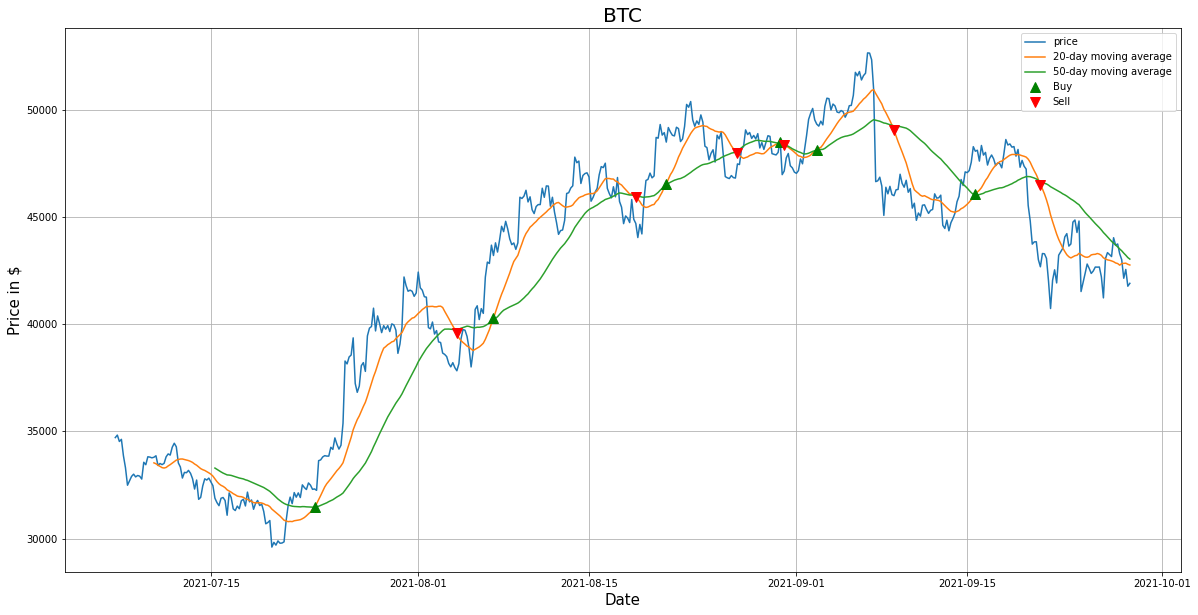

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
# plot price, short-term and long-term moving averages 
# The label parameter is useful for the legend
plt.plot(result.index, result['Price'], label='price')
plt.plot(result.index, result['SMA20'], label='20-day moving average')
plt.plot(result.index, result['SMA50'], label='50-day moving average')

# plot ‘buy’ signals
plt.plot(result[result["Position"] == 1.0].index, result["SMA20"][result["Position"] == 1.0], "^", markersize = 10, color = "g", label = "Buy")

# plot ‘sell’ signals
plt.plot(result[result['Position'] == -1].index, result['SMA20'][result['Position'] == -1], 'v', markersize = 10, color = 'r', label = 'Sell')

plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('BTC', fontsize = 20)

plt.legend()
plt.grid()
plt.show()